In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from matplotlib.ticker import MultipleLocator
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
import random
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
df = pd.read_csv('clustering_data.csv')
df

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age,Sgot_survival,Bilirubin_survival,Copper_survival
0,D-penicillamine,M,N,N,N,N,0.686343,1.226787,3.35,5.216554,1.984996,5.103735,2.458623,394.0,0.257480,3.0,59,1,1,1
1,Placebo,F,N,N,N,N,-0.108075,1.228069,3.54,4.187797,1.982075,4.825497,2.559333,361.0,0.257495,3.0,53,1,0,1
2,Placebo,F,N,Y,Y,Y,0.908403,1.226244,3.55,4.937115,1.971740,4.707243,2.383292,199.0,0.257500,4.0,38,1,1,1
3,Placebo,F,N,N,N,N,-0.579019,1.224585,3.50,4.103334,1.985848,4.207263,2.584052,269.0,0.257492,3.0,51,0,0,0
4,Placebo,F,N,Y,N,N,0.093159,1.227626,3.65,4.187797,1.976184,4.756302,2.584052,298.0,0.257491,4.0,46,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,D-penicillamine,F,N,N,N,N,-0.235553,1.226570,3.56,3.671984,1.985460,4.307542,2.795891,344.0,0.257483,2.0,46,0,0,0
7901,Placebo,F,N,Y,N,N,-0.108075,1.224760,3.43,4.171451,1.982075,4.875504,2.524058,277.0,0.257485,4.0,47,1,0,1
7902,D-penicillamine,F,N,N,Y,S,0.589481,1.223038,3.19,3.972033,1.968394,4.185894,2.453563,200.0,0.257505,2.0,71,0,1,0
7903,D-penicillamine,M,N,Y,N,N,-0.389082,1.224219,2.75,3.496951,1.970881,3.995444,2.640330,221.0,0.257491,4.0,63,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Drug                7905 non-null   object 
 1   Sex                 7905 non-null   object 
 2   Ascites             7905 non-null   object 
 3   Hepatomegaly        7905 non-null   object 
 4   Spiders             7905 non-null   object 
 5   Edema               7905 non-null   object 
 6   Bilirubin           7905 non-null   float64
 7   Cholesterol         7905 non-null   float64
 8   Albumin             7905 non-null   float64
 9   Copper              7905 non-null   float64
 10  Alk_Phos            7905 non-null   float64
 11  SGOT                7905 non-null   float64
 12  Tryglicerides       7905 non-null   float64
 13  Platelets           7905 non-null   float64
 14  Prothrombin         7905 non-null   float64
 15  Stage               7905 non-null   float64
 16  Age   

In [8]:
# pipeline para escalar numericos y codificar categoricos
numerical_columns = df.select_dtypes(include='number')
categorical_columns = df.select_dtypes(exclude='number')


# automatizado de transformacion categoricas y numericas (Normalizado y OneHot)
categorical_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore',sparse_output=False, drop='first'))
numerical_pipeline = make_pipeline(MinMaxScaler())

preprocessing = ColumnTransformer([
    ('num', numerical_pipeline, numerical_columns.columns),
    ('cat', categorical_pipeline, categorical_columns.columns),
], remainder='passthrough')

# Unimos en un pipeline global
pipeline_full = make_pipeline(preprocessing)

X_processed = pipeline_full.fit_transform(df)
X_processed

array([[0.70391991, 0.61188349, 0.51865672, ..., 0.        , 0.        ,
        0.        ],
       [0.46256772, 0.66758531, 0.58955224, ..., 0.        , 0.        ,
        0.        ],
       [0.77138408, 0.58831218, 0.59328358, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.67449227, 0.44900595, 0.45895522, ..., 1.        , 1.        ,
        0.        ],
       [0.37719491, 0.50032879, 0.29477612, ..., 0.        , 0.        ,
        0.        ],
       [0.37719491, 0.51621679, 0.4738806 , ..., 0.        , 0.        ,
        0.        ]])

C:\Users\jarod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Coeficientes de Silueta para 2 Clusters:
Cluster 1: 0.18496665879277002
Cluster 2: 0.2760666308577836


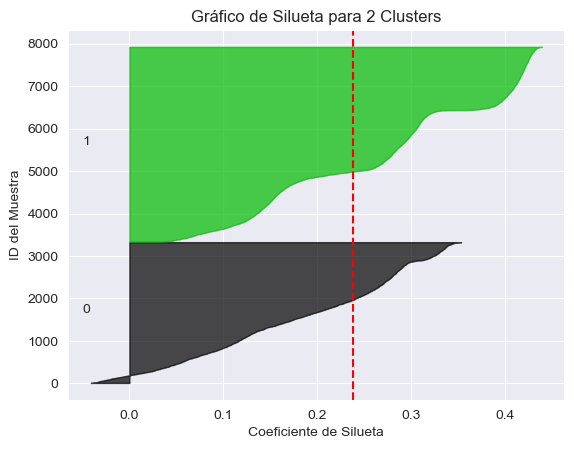

C:\Users\jarod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Coeficientes de Silueta para 3 Clusters:
Cluster 1: 0.24252010453157757
Cluster 2: 0.17213234590597926
Cluster 3: 0.12259964163253764


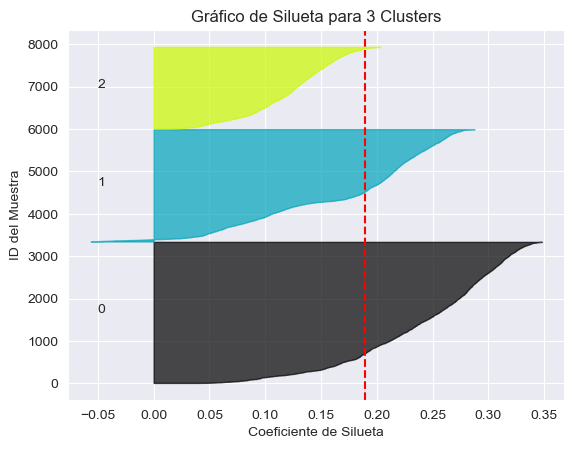

C:\Users\jarod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Coeficientes de Silueta para 4 Clusters:
Cluster 1: 0.16498679706984293
Cluster 2: 0.17090372774813573
Cluster 3: 0.08988096367947601
Cluster 4: 0.3031785953633273


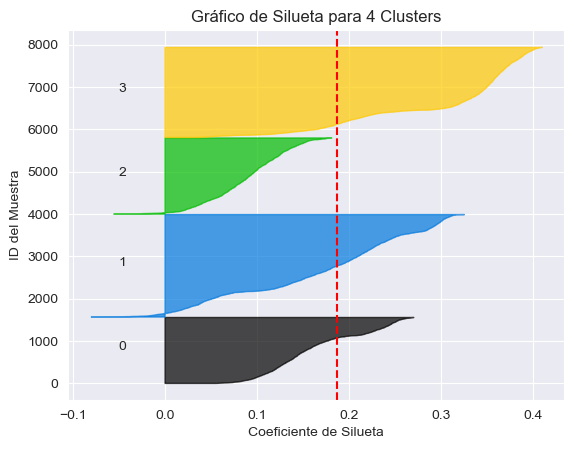

C:\Users\jarod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Coeficientes de Silueta para 5 Clusters:
Cluster 1: 0.14802215591874832
Cluster 2: 0.22775974326936374
Cluster 3: 0.1462876759262292
Cluster 4: 0.08953534349707223
Cluster 5: 0.2444227766058536


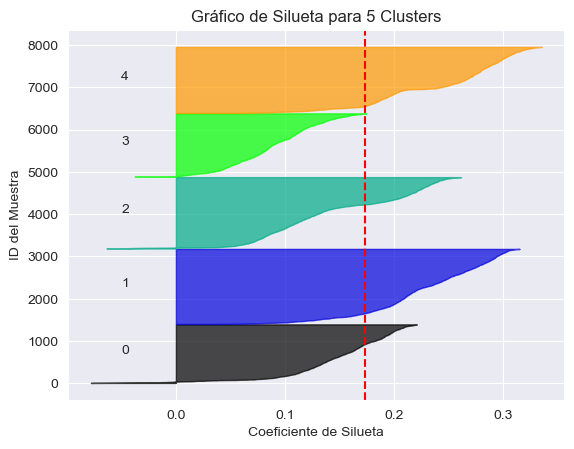

C:\Users\jarod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Coeficientes de Silueta para 6 Clusters:
Cluster 1: 0.12885691886253386
Cluster 2: 0.16756843612102415
Cluster 3: 0.36109768692553307
Cluster 4: 0.15006761230765625
Cluster 5: 0.1091994177393114
Cluster 6: 0.14151310909542847


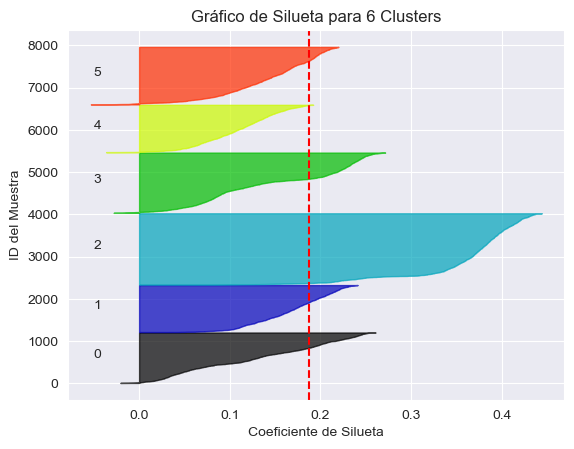

C:\Users\jarod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Coeficientes de Silueta para 7 Clusters:
Cluster 1: 0.1582477359054065
Cluster 2: 0.16320493239650738
Cluster 3: 0.3252946762084657
Cluster 4: 0.29447203965596874
Cluster 5: 0.13408849907535192
Cluster 6: 0.08316006052937006
Cluster 7: 0.09050073014252423


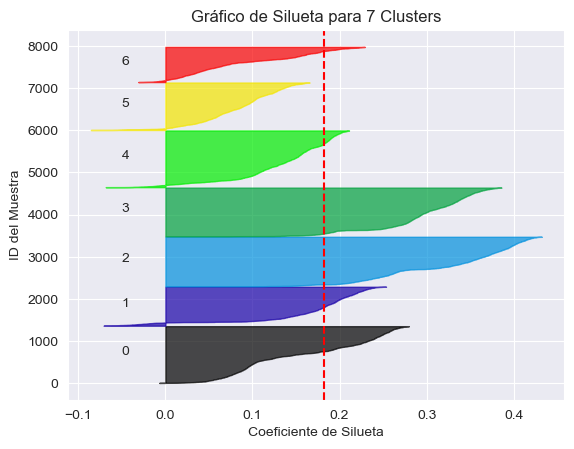

C:\Users\jarod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Coeficientes de Silueta para 8 Clusters:
Cluster 1: 0.18550321546584203
Cluster 2: 0.14653026617582188
Cluster 3: 0.08966114350935844
Cluster 4: 0.3021379455733059
Cluster 5: 0.08374467651417378
Cluster 6: 0.14147444751090113
Cluster 7: 0.20538683407440425
Cluster 8: 0.3039981109360185


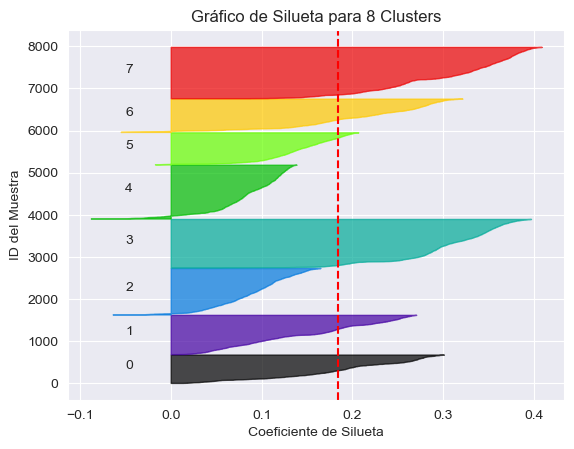

C:\Users\jarod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Coeficientes de Silueta para 9 Clusters:
Cluster 1: 0.3248283767658201
Cluster 2: 0.1775509093673367
Cluster 3: 0.13773186438142437
Cluster 4: 0.14939618163321414
Cluster 5: 0.15605943704790154
Cluster 6: 0.2146294697765024
Cluster 7: 0.2950684792146439
Cluster 8: 0.09323195483692709
Cluster 9: 0.1257483558638641


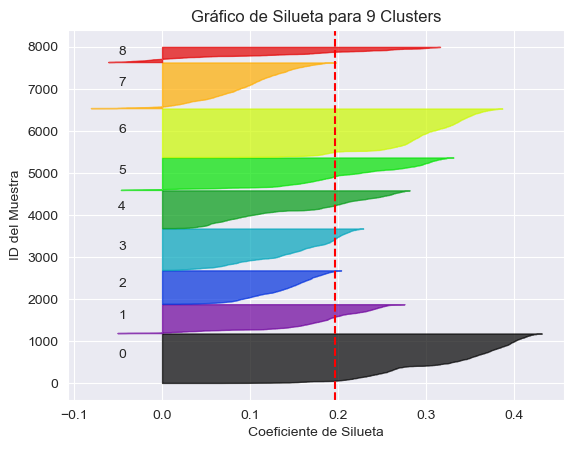

C:\Users\jarod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Coeficientes de Silueta para 10 Clusters:
Cluster 1: 0.1594365262508737
Cluster 2: 0.33576184005130544
Cluster 3: 0.1175309446740949
Cluster 4: 0.14905893501300335
Cluster 5: 0.1593263341470557
Cluster 6: 0.30403335335791637
Cluster 7: 0.2350421354266491
Cluster 8: 0.19677907944546538
Cluster 9: 0.22233365620959533
Cluster 10: 0.12048605438193195


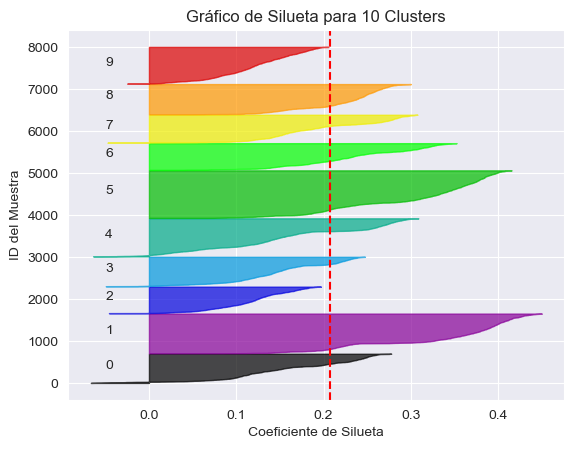

In [12]:
# Número de clusters a probar
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Crea un objeto KMeans con el número actual de clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X_processed)

    # Calcula el valor promedio de la silueta para todos los puntos
    silhouette_avg = silhouette_score(X_processed, cluster_labels)

    # Calcula la silueta de cada punto
    sample_silhouette_values = silhouette_samples(X_processed, cluster_labels)
    
     # Muestra los valores de los coeficientes de silueta de cada cluster
    print(f"Coeficientes de Silueta para {n_clusters} Clusters:")
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        avg_silhouette_i = np.mean(ith_cluster_silhouette_values)
        print(f"Cluster {i + 1}: {avg_silhouette_i}")
    
    # Crea el gráfico de silueta
    plt.figure()
    plt.title(f"Gráfico de Silueta para {n_clusters} Clusters")
    plt.xlabel("Coeficiente de Silueta")
    plt.ylabel("ID del Muestra")

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.show()

In [13]:
# Crear con cluster
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_processed)

In [16]:
# transformar X_processed a series de pandas(dataframe)
df = pd.DataFrame(X_processed, columns= preprocessing.get_feature_names_out())

In [18]:
# unimos vector de predicciones con df
df['cluster'] = list(y_kmeans)

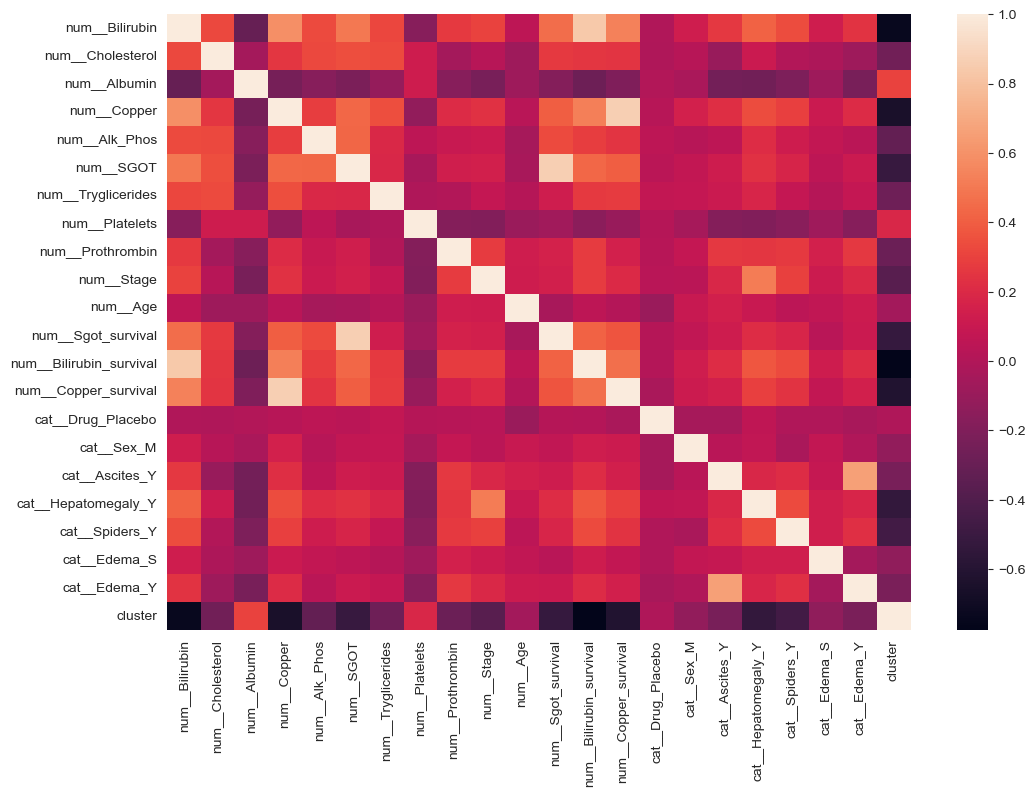

In [21]:
matrix_corr = df.corr(method='spearman')
figure = plt.figure(figsize=(12, 8))
sns.heatmap(matrix_corr, annot=False)
plt.show()